In [1]:
%pylab inline
import os
import keras
import numpy as np
import pandas as pd
import keras.backend as K
import tensorflow as tf
import sklearn.metrics as metrics

import time

from keras import callbacks
from keras.models import Model
from keras.optimizers import SGD
from keras.layers import Dense, Input
from keras.initializers import VarianceScaling
from keras.engine.topology import Layer, InputSpec

#from scipy.misc import imread
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, normalized_mutual_info_score

Populating the interactive namespace from numpy and matplotlib


Using TensorFlow backend.


In [2]:
# To stop potential randomness
seed = 128
rng = np.random.RandomState(seed)

In [3]:
os.getcwd()

'/home/jbang36/eva/others'

In [4]:
root_dir = os.path.abspath('../')
data_dir = os.path.join(root_dir, 'data', 'mnist')
root_dir
data_dir

'/home/jbang36/eva/data/mnist'

In [5]:
(train_x, train_y), (test_x, test_y) = tf.keras.datasets.mnist.load_data()


8


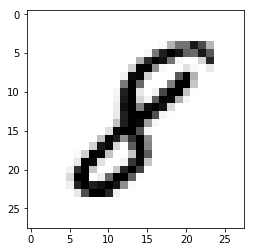

In [6]:
import matplotlib.pyplot as plt
image_index = 7777 # You may select anything up to 60,000
print(train_y[image_index]) # The label is 8
plt.imshow(train_x[image_index], cmap='Greys')

In [7]:
train_x = train_x.reshape(-1, 784).astype('float32')
test_x = test_x.reshape(-1, 784).astype('float32')
train_x /= 255.0
test_x /= 255.0


In [11]:
# Simple KMeans
km = KMeans(n_jobs=-1, n_clusters=10, n_init=20)
start_time = time.time()
km.fit(train_x)
print("Total time it took to train k_means is ", time.time() - start_time, " seconds")
pred = km.predict(test_x)
kmeans_score = normalized_mutual_info_score(test_y, pred)

Total time it took to train k_means is  613.3203248977661  seconds


In [35]:
#Autoencoder network
# this is our input placeholder
input_img = Input(shape=(784,))

# "encoded" is the encoded representation of the input
encoded = Dense(500, activation='relu')(input_img)
encoded = Dense(500, activation='relu')(encoded)
encoded = Dense(2000, activation='relu')(encoded)

#Value I want to play around with is thisi signmoid
encoded = Dense(10, activation='sigmoid')(encoded)

# "decoded" is the lossy reconstruction of the input
decoded = Dense(2000, activation='relu')(encoded)
decoded = Dense(500, activation='relu')(decoded)
decoded = Dense(500, activation='relu')(decoded)
decoded = Dense(784)(decoded)

# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)
autoencoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         (None, 784)               0         
_________________________________________________________________
dense_25 (Dense)             (None, 500)               392500    
_________________________________________________________________
dense_26 (Dense)             (None, 500)               250500    
_________________________________________________________________
dense_27 (Dense)             (None, 2000)              1002000   
_________________________________________________________________
dense_28 (Dense)             (None, 50)                100050    
_________________________________________________________________
dense_29 (Dense)             (None, 2000)              102000    
_________________________________________________________________
dense_30 (Dense)             (None, 500)               1000500   
__________

In [36]:
encoder = Model(input_img, encoded)

In [37]:
autoencoder.compile(optimizer='adam', loss='mse')

In [38]:
start_time = time.time()
train_history = autoencoder.fit(train_x, train_x, epochs=200, batch_size=2048, validation_data=(test_x, test_x))
print("Total time it took to train autoencoder is ", time.time() - start_time, " seconds")


Train on 60000 samples, validate on 10000 samples
Epoch 1/200
60000/60000 [==============================] - 3s 58us/step - loss: 0.0731 - val_loss: 0.0654
Epoch 2/200
60000/60000 [==============================] - 2s 27us/step - loss: 0.0632 - val_loss: 0.0597
Epoch 3/200
60000/60000 [==============================] - 2s 27us/step - loss: 0.0576 - val_loss: 0.0537
Epoch 4/200
60000/60000 [==============================] - 2s 29us/step - loss: 0.0485 - val_loss: 0.0441
Epoch 5/200
60000/60000 [==============================] - 2s 31us/step - loss: 0.0405 - val_loss: 0.0367
Epoch 6/200
60000/60000 [==============================] - 2s 28us/step - loss: 0.0344 - val_loss: 0.0324
Epoch 7/200
60000/60000 [==============================] - 2s 28us/step - loss: 0.0308 - val_loss: 0.0287
Epoch 8/200
60000/60000 [==============================] - 2s 28us/step - loss: 0.0277 - val_loss: 0.0263
Epoch 9/200
60000/60000 [==============================] - 2s 28us/step - loss: 0.0254 - val_loss: 0.0

60000/60000 [==============================] - 2s 28us/step - loss: 0.0057 - val_loss: 0.0061
Epoch 154/200
60000/60000 [==============================] - 2s 28us/step - loss: 0.0056 - val_loss: 0.0063
Epoch 155/200
60000/60000 [==============================] - 2s 28us/step - loss: 0.0057 - val_loss: 0.0060
Epoch 156/200
60000/60000 [==============================] - 2s 28us/step - loss: 0.0056 - val_loss: 0.0064
Epoch 157/200
60000/60000 [==============================] - 2s 30us/step - loss: 0.0056 - val_loss: 0.0060
Epoch 158/200
60000/60000 [==============================] - 2s 28us/step - loss: 0.0056 - val_loss: 0.0060
Epoch 159/200
60000/60000 [==============================] - 2s 28us/step - loss: 0.0056 - val_loss: 0.0061
Epoch 160/200
60000/60000 [==============================] - 2s 28us/step - loss: 0.0056 - val_loss: 0.0061
Epoch 161/200
60000/60000 [==============================] - 2s 28us/step - loss: 0.0055 - val_loss: 0.0061
Epoch 162/200
60000/60000 [===============

| nodes | epoch | loss | k-means accuracy|
| --- | --- | --- | --- |
| 5 | 200 | 0.022 | 0.7  |
| 10 | 500 | 0.01 | 0.8  |
| 20 | 200 | 0.088 | 0.66   |
| 50 | 200 | 0.0056 | 0.57 |
| 100 | 200 | 0.05 |  0.5 |

In [39]:
pred_auto_train = encoder.predict(train_x)
pred_auto = encoder.predict(test_x)

In [40]:
pred_auto_train[0]


array([0.24276054, 0.31561896, 0.6970326 , 0.60552293, 0.4603314 ,
       0.2988927 , 0.42137945, 0.36478987, 0.159174  , 0.7464836 ,
       0.4647177 , 0.46423352, 0.42450443, 0.5328621 , 0.28814837,
       0.46265915, 0.6122539 , 0.3371671 , 0.36244312, 0.15607393,
       0.5333175 , 0.4629024 , 0.20623149, 0.20255852, 0.5381532 ,
       0.21110724, 0.27205837, 0.23290189, 0.5586298 , 0.7902839 ,
       0.4829538 , 0.5424529 , 0.29667726, 0.48150453, 0.33089536,
       0.4275643 , 0.43934926, 0.5620069 , 0.3493944 , 0.7728975 ,
       0.870998  , 0.39995232, 0.16171396, 0.44085842, 0.58879215,
       0.3978635 , 0.13912138, 0.6388631 , 0.2563932 , 0.28466693],
      dtype=float32)

In [41]:
km_auto = KMeans(n_jobs=-1, n_clusters=10, n_init=20)

In [42]:
start_time = time.time()
km_auto.fit(pred_auto_train)
print("Total time it took to train k_means is ", time.time() - start_time, " seconds")

pred = km_auto.predict(pred_auto)

Total time it took to train k_means is  37.32961106300354  seconds


In [43]:
auto_score = normalized_mutual_info_score(test_y, pred)
auto_score


/nethome/jbang36/miniconda2/envs/pp36/lib/python3.6/site-packages/sklearn/metrics/cluster/supervised.py:844: FutureWarning: The behavior of NMI will change in version 0.22. To match the behavior of 'v_measure_score', NMI will use average_method='arithmetic' by default.
  FutureWarning)


0.5703520881792029

In [44]:
"""
Keras implementation for Deep Embedded Clustering (DEC) algorithm:

Original Author:
    Xifeng Guo. 2017.1.30
"""


def autoencoder(dims, act='relu', init='glorot_uniform'):
    """
    Fully connected auto-encoder model, symmetric.
    Arguments:
        dims: list of number of units in each layer of encoder. dims[0] is input dim, dims[-1] is units in hidden layer.
            The decoder is symmetric with encoder. So number of layers of the auto-encoder is 2*len(dims)-1
        act: activation, not applied to Input, Hidden and Output layers
    return:
        (ae_model, encoder_model), Model of autoencoder and model of encoder
    """
    n_stacks = len(dims) - 1
    # input
    x = Input(shape=(dims[0],), name='input')
    h = x

    # internal layers in encoder
    for i in range(n_stacks-1):
        h = Dense(dims[i + 1], activation=act, kernel_initializer=init, name='encoder_%d' % i)(h)

    # hidden layer
    h = Dense(dims[-1], kernel_initializer=init, name='encoder_%d' % (n_stacks - 1))(h)  # hidden layer, features are extracted from here

    y = h
    # internal layers in decoder
    for i in range(n_stacks-1, 0, -1):
        y = Dense(dims[i], activation=act, kernel_initializer=init, name='decoder_%d' % i)(y)

    # output
    y = Dense(dims[0], kernel_initializer=init, name='decoder_0')(y)

    return Model(inputs=x, outputs=y, name='AE'), Model(inputs=x, outputs=h, name='encoder')


class ClusteringLayer(Layer):
    """
    Clustering layer converts input sample (feature) to soft label, i.e. a vector that represents the probability of the
    sample belonging to each cluster. The probability is calculated with student's t-distribution.

    # Example
    ```
        model.add(ClusteringLayer(n_clusters=10))
    ```
    # Arguments
        n_clusters: number of clusters.
        weights: list of Numpy array with shape `(n_clusters, n_features)` witch represents the initial cluster centers.
        alpha: parameter in Student's t-distribution. Default to 1.0.
    # Input shape
        2D tensor with shape: `(n_samples, n_features)`.
    # Output shape
        2D tensor with shape: `(n_samples, n_clusters)`.
    """

    def __init__(self, n_clusters, weights=None, alpha=1.0, **kwargs):
        if 'input_shape' not in kwargs and 'input_dim' in kwargs:
            kwargs['input_shape'] = (kwargs.pop('input_dim'),)
        super(ClusteringLayer, self).__init__(**kwargs)
        self.n_clusters = n_clusters
        self.alpha = alpha
        self.initial_weights = weights
        self.input_spec = InputSpec(ndim=2)

    def build(self, input_shape):
        assert len(input_shape) == 2
        input_dim = input_shape[1]
        self.input_spec = InputSpec(dtype=K.floatx(), shape=(None, input_dim))
        self.clusters = self.add_weight((self.n_clusters, input_dim), initializer='glorot_uniform', name='clusters')
        if self.initial_weights is not None:
            self.set_weights(self.initial_weights)
            del self.initial_weights
        self.built = True

    def call(self, inputs, **kwargs):
        """ student t-distribution, as same as used in t-SNE algorithm.
                 q_ij = 1/(1+dist(x_i, u_j)^2), then normalize it.
        Arguments:
            inputs: the variable containing data, shape=(n_samples, n_features)
        Return:
            q: student's t-distribution, or soft labels for each sample. shape=(n_samples, n_clusters)
        """
        q = 1.0 / (1.0 + (K.sum(K.square(K.expand_dims(inputs, axis=1) - self.clusters), axis=2) / self.alpha))
        q **= (self.alpha + 1.0) / 2.0
        q = K.transpose(K.transpose(q) / K.sum(q, axis=1))
        return q

    def compute_output_shape(self, input_shape):
        assert input_shape and len(input_shape) == 2
        return input_shape[0], self.n_clusters

    def get_config(self):
        config = {'n_clusters': self.n_clusters}
        base_config = super(ClusteringLayer, self).get_config()
        return dict(list(base_config.items()) + list(config.items()))


class DEC(object):
    def __init__(self,
                 dims,
                 n_clusters=10,
                 alpha=1.0,
                 init='glorot_uniform'):

        super(DEC, self).__init__()

        self.dims = dims
        self.input_dim = dims[0]
        self.n_stacks = len(self.dims) - 1

        self.n_clusters = n_clusters
        self.alpha = alpha
        self.autoencoder, self.encoder = autoencoder(self.dims, init=init)

        # prepare DEC model
        clustering_layer = ClusteringLayer(self.n_clusters, name='clustering')(self.encoder.output)
        self.model = Model(inputs=self.encoder.input, outputs=clustering_layer)

    def pretrain(self, x, y=None, optimizer='adam', epochs=200, batch_size=256, save_dir='results/temp'):
        print('...Pretraining...')
        self.autoencoder.compile(optimizer=optimizer, loss='mse')

        csv_logger = callbacks.CSVLogger(save_dir + '/pretrain_log.csv')
        cb = [csv_logger]
        if y is not None:
            class PrintACC(callbacks.Callback):
                def __init__(self, x, y):
                    self.x = x
                    self.y = y
                    super(PrintACC, self).__init__()

                def on_epoch_end(self, epoch, logs=None):
                    if epoch % int(epochs/10) != 0:
                        return
                    feature_model = Model(self.model.input,
                                          self.model.get_layer(
                                              'encoder_%d' % (int(len(self.model.layers) / 2) - 1)).output)
                    features = feature_model.predict(self.x)
                    km = KMeans(n_clusters=len(np.unique(self.y)), n_init=20, n_jobs=4)
                    y_pred = km.fit_predict(features)
                    # print()
                    print(' '*8 + '|==>  acc: %.4f,  nmi: %.4f  <==|'
                          % (metrics.accuracy_score(self.y, y_pred), metrics.normalized_mutual_info_score(self.y, y_pred)))

            cb.append(PrintACC(x, y))

        # begin pretraining
        t0 = time.time()
        self.autoencoder.fit(x, x, batch_size=batch_size, epochs=epochs, callbacks=cb)
        print('Pretraining time: ', time.time() - t0)
        self.autoencoder.save_weights(save_dir + '/ae_weights.h5')
        print('Pretrained weights are saved to %s/ae_weights.h5' % save_dir)
        self.pretrained = True

    def load_weights(self, weights):  # load weights of DEC model
        self.model.load_weights(weights)

    def extract_features(self, x):
        return self.encoder.predict(x)

    def predict(self, x):  # predict cluster labels using the output of clustering layer
        q = self.model.predict(x, verbose=0)
        return q.argmax(1)

    @staticmethod
    def target_distribution(q):
        weight = q ** 2 / q.sum(0)
        return (weight.T / weight.sum(1)).T

    def compile(self, optimizer='sgd', loss='kld'):
        self.model.compile(optimizer=optimizer, loss=loss)

    def fit(self, x, y=None, maxiter=2e4, batch_size=256, tol=1e-3,
            update_interval=140, save_dir='./results/temp'):

        print('Update interval', update_interval)
        save_interval = x.shape[0] / batch_size * 5  # 5 epochs
        print('Save interval', save_interval)

        # Step 1: initialize cluster centers using k-means
        t1 = time.time()
        print('Initializing cluster centers with k-means.')
        kmeans = KMeans(n_clusters=self.n_clusters, n_init=20)
        y_pred = kmeans.fit_predict(self.encoder.predict(x))
        y_pred_last = np.copy(y_pred)
        self.model.get_layer(name='clustering').set_weights([kmeans.cluster_centers_])

        # Step 2: deep clustering
        # logging file
        import csv
        logfile = open(save_dir + '/dec_log.csv', 'w')
        logwriter = csv.DictWriter(logfile, fieldnames=['iter', 'acc', 'nmi', 'ari', 'loss'])
        logwriter.writeheader()

        loss = 0
        index = 0
        index_array = np.arange(x.shape[0])
        for ite in range(int(maxiter)):
            if ite % update_interval == 0:
                q = self.model.predict(x, verbose=0)
                p = self.target_distribution(q)  # update the auxiliary target distribution p

                # evaluate the clustering performance
                y_pred = q.argmax(1)
                if y is not None:
                    acc = np.round(metrics.accuracy_score(y, y_pred), 5)
                    nmi = np.round(metrics.normalized_mutual_info_score(y, y_pred), 5)
                    ari = np.round(metrics.adjusted_rand_score(y, y_pred), 5)
                    loss = np.round(loss, 5)
                    
                    logdict = dict(iter=ite, acc=acc, nmi=nmi, ari=ari, loss=loss)
                    logwriter.writerow(logdict)
                    print('Iter %d: acc = %.5f, nmi = %.5f, ari = %.5f' % (ite, acc, nmi, ari), ' ; loss=', loss)

                # check stop criterion
                delta_label = np.sum(y_pred != y_pred_last).astype(np.float32) / y_pred.shape[0]
                y_pred_last = np.copy(y_pred)
                if ite > 0 and delta_label < tol:
                    print('delta_label ', delta_label, '< tol ', tol)
                    print('Reached tolerance threshold. Stopping training.')
                    logfile.close()
                    break

            # train on batch
            # if index == 0:
            #     np.random.shuffle(index_array)
            idx = index_array[index * batch_size: min((index+1) * batch_size, x.shape[0])]
            self.model.train_on_batch(x=x[idx], y=p[idx])
            index = index + 1 if (index + 1) * batch_size <= x.shape[0] else 0

            # save intermediate model
            if ite % save_interval == 0:
                print('saving model to:', save_dir + '/DEC_model_' + str(ite) + '.h5')
                self.model.save_weights(save_dir + '/DEC_model_' + str(ite) + '.h5')

            ite += 1

        # save the trained model
        logfile.close()
        print('saving model to:', save_dir + '/DEC_model_final.h5')
        self.model.save_weights(save_dir + '/DEC_model_final.h5')

        return y_pred




In [ ]:
# setting the hyper parameters
init = 'glorot_uniform'
pretrain_optimizer = 'adam'
dataset = 'mnist'
batch_size = 2048
maxiter = 2e4
tol = 0.0001
save_dir = 'analysis_results'

import os
if not os.path.exists(save_dir):
    os.makedirs(save_dir)

update_interval = 100
pretrain_epochs = 200
init = VarianceScaling(scale=1. / 3., mode='fan_in',
                       distribution='uniform')  # [-limit, limit], limit=sqrt(1./fan_in)
#pretrain_optimizer = SGD(lr=1, momentum=0.9)


# prepare the DEC model
dec = DEC(dims=[train_x.shape[-1], 500, 500, 2000, 10], n_clusters=10, init=init)

dec.pretrain(x=train_x, y=train_y, optimizer=pretrain_optimizer,
             epochs=pretrain_epochs, batch_size=batch_size,
             save_dir=save_dir)

In [27]:
dec.model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           (None, 784)               0         
_________________________________________________________________
encoder_0 (Dense)            (None, 500)               392500    
_________________________________________________________________
encoder_1 (Dense)            (None, 500)               250500    
_________________________________________________________________
encoder_2 (Dense)            (None, 2000)              1002000   
_________________________________________________________________
encoder_3 (Dense)            (None, 10)                20010     
_________________________________________________________________
clustering (ClusteringLayer) (None, 10)                100       
Total params: 1,665,110
Trainable params: 1,665,110
Non-trainable params: 0
_________________________________________________________________


In [28]:
dec.compile(optimizer=SGD(0.01, 0.9), loss='kld')

In [29]:
y_pred = dec.fit(train_x, y=train_y, tol=tol, maxiter=maxiter, batch_size=batch_size,
                 update_interval=update_interval, save_dir=save_dir)

Update interval 200
Save interval 146.484375
Initializing cluster centers with k-means.


/nethome/jbang36/miniconda2/envs/pp36/lib/python3.6/site-packages/sklearn/metrics/cluster/supervised.py:844: FutureWarning: The behavior of NMI will change in version 0.22. To match the behavior of 'v_measure_score', NMI will use average_method='arithmetic' by default.
  FutureWarning)


Iter 0: acc = 0.05088, nmi = 0.77332, ari = 0.72686  ; loss= 0
saving model to: results/DEC_model_0.h5
Iter 200: acc = 0.05050, nmi = 0.77894, ari = 0.73977  ; loss= 0
Iter 400: acc = 0.05045, nmi = 0.79176, ari = 0.75790  ; loss= 0
Iter 600: acc = 0.04940, nmi = 0.80387, ari = 0.77173  ; loss= 0
Iter 800: acc = 0.04915, nmi = 0.81126, ari = 0.77959  ; loss= 0
Iter 1000: acc = 0.04907, nmi = 0.81544, ari = 0.78393  ; loss= 0
Iter 1200: acc = 0.04887, nmi = 0.81856, ari = 0.78698  ; loss= 0
Iter 1400: acc = 0.04897, nmi = 0.82119, ari = 0.78957  ; loss= 0
Iter 1600: acc = 0.04893, nmi = 0.82321, ari = 0.79143  ; loss= 0
Iter 1800: acc = 0.04865, nmi = 0.82513, ari = 0.79332  ; loss= 0
Iter 2000: acc = 0.04868, nmi = 0.82601, ari = 0.79421  ; loss= 0
Iter 2200: acc = 0.04862, nmi = 0.82645, ari = 0.79450  ; loss= 0
Iter 2400: acc = 0.04857, nmi = 0.82719, ari = 0.79518  ; loss= 0
Iter 2600: acc = 0.04857, nmi = 0.82789, ari = 0.79591  ; loss= 0
Iter 2800: acc = 0.04865, nmi = 0.82805, ar

In [30]:
pred_val = dec.predict(test_x)

In [31]:
dec_score = normalized_mutual_info_score(test_y, pred_val)
dec_score

0.8351783283745353

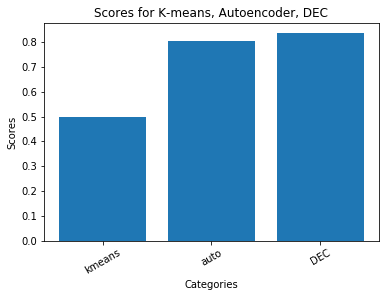

<Figure size 432x288 with 0 Axes>

In [37]:
# Need to plot the accuracies and save the results
# kmeans_score = 0.49
# auto_score = 0.8
# dec_score = 0.835




plt.bar([0,1,2], [kmeans_score, auto_score, dec_score])
plt.xticks([0,1,2], ['kmeans', 'auto', 'DEC'], rotation=30)
plt.xlabel('Categories')
plt.ylabel('Scores')
plt.title('Scores for K-means, Autoencoder, DEC')

plt.show()

savefig('scores_for_prototype.png')